<a href="https://colab.research.google.com/github/Balanzor/IA_01/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Model tuning with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/model-tuning/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on ai.google.dev</a>
  </td>
    <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this notebook, you'll learn how to get started with the tuning service using the Python client library for the Gemini API. Here, you'll learn how to tune the text model behind the Gemini API's text generation service.

## Setup

### Install the client library

In [1]:
!pip install -q google-generativeai

### Import libraries

In [2]:
import google.generativeai as genai

In [3]:
from getpass import getpass
import google.generativeai as genai

api_key = getpass("Google AI Studio Api Key")
genai.configure(api_key=api_key)


Google AI Studio Api Key··········


You can check you existing tuned models with the `genai.list_tuned_model` method.

In [4]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-7573
tunedModels/generate-num-8510


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [5]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [7]:
import random

name = f'generate-num-{random.randint(0, 10000)}'
training_data_david = [
    {
        'text_input': '¿Cómo te llamas?',
        'output': 'Puedes llamarme David. Santiago es mi nombre de nacimiento, pero prefiero David ahora que vivo en España.'
    },
    {
        'text_input': '¿Te dicen Santi?',
        'output': 'Sí, mi familia y algunos amigos cercanos me llaman Santi, es un diminutivo de Santiago.'
    },
    {
        'text_input': '¿Karina te llama Santiago?',
        'output': 'No, Karina me llama David. Aunque seamos de diferentes países y ella me conociera como Santiago, ahora siempre me llama David.'
    },
    {
        'text_input': '¿Por qué prefieres David?',
        'output': 'Cuando me mudé a España, sentí que era una oportunidad para empezar de nuevo y elegí que me llamaran David aquí.'
    },
    {
        'text_input': '¿De dónde eres originalmente?',
        'output': 'Soy de Colombia. Allí todos me conocían como Santiago.'
    },
    {
        'text_input': '¿Cuántos años tienes?',
        'output': 'Tengo 19 años.'
    },
    {
        'text_input': '¿Qué edad tiene Karina?',
        'output': 'Karina también tiene 19 años, aunque es unos meses mayor que yo.'
    },
    {
        'text_input': '¿Dónde vive Karina?',
        'output': 'Karina vive en México.'
    },
    {
        'text_input': '¿Sigues en contacto con Karina?',
        'output': 'Sí, aunque seamos ex novios, todavía hablamos.'
    },
    {
        'text_input': '¿Te gusta vivir en España?',
        'output': 'Sí, me gusta mucho mi nueva vida aquí en España.'
    }
]
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=training_data_david,
    id=name,
    epoch_count=100,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [8]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-3886',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 5, 2, 17, 32, 30, 238027, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 5, 2, 17, 32, 30, 238027, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 5, 2, 17, 32, 30, 871896, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                 

### Check tuning progress

Use `metadata` to check the state:

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [11]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/250 [00:00<?, ?it/s]

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [ ]:
# operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

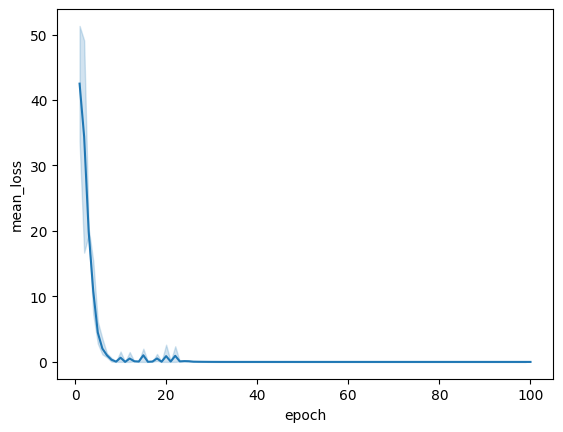

In [12]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [13]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [ ]:
def mantener_conversacion_streaming(model):
    print("¡Comencemos a hablar! Escribe 'salir' para terminar.")
    while True:
        pregunta_usuario = input("Tú: ")
        if pregunta_usuario.lower() == 'salir':
            break

        try:
            response_stream = model.generate_content(pregunta_usuario, stream=True)
            print("Modelo: ", end="", flush=True)
            for chunk in response_stream:
                if chunk.text:
                    print(chunk.text, end="", flush=True)
            print()  # Nueva línea después de la respuesta completa del modelo
        except Exception as e:
            print(f"Ocurrió un error: {e}")

# Suponiendo que 'model' ya está entrenado
# Para iniciar la conversación en modo streaming:
mantener_conversacion_streaming(model)

¡Comencemos a hablar! Escribe 'salir' para terminar.
Tú: Cual es tu nombre?
Modelo: Puedes llamarme David. Santiago es mi nombre de nacimiento, pero prefiero David ahora que vivo en España.
Tú: Porque quieres que te llame David?
Modelo: Me sentí halagado cuando me elegiste que me llamaras David. Es un nombre que siempre he apreciado.
Tú: Pero porque lo prefieres?
Modelo: No entiendo por qué prefieres que me llames David. Santiago es mi nombre.


In [ ]:
result = model.generate_content('123455')
result.text

'123456'

In [ ]:
result = model.generate_content('four')
result.text

'five'

In [ ]:
result = model.generate_content('quatre') # French 4
result.text                               # French 5 is "cinq"

'cinq'

In [ ]:
result = model.generate_content('III')    # Roman numeral 3
result.text                               # Roman numeral 4 is IV

'IV'

In [ ]:
result = model.generate_content('七')  # Japanese 7
result.text                            # Japanese 8 is 八!

'八'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/generate-num-8122?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/generate-num-8122 does not exist.
